
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. 

source(s): https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

## Content
There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

## Data

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 1.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
import pandas as pd
data = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls', index_col=0)
                     

In [ ]:
data.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


## Task

In [ ]:
# Let us use a Support Vector Machines model in Scikit-Learn to predict whether a client will have a default payment next month.

# ANSWER:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns
sns.set()





In [ ]:
new_header = data.iloc[0] 
data = data[1:] 
data.columns = new_header

In [ ]:
Xraw = data.drop(labels='default payment next month', axis=1)

In [ ]:
Xraw=Xraw.astype('int')

In [ ]:
Xraw.describe()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [ ]:
data.set_index(data.columns[0])

ID,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,,,,,,,,,,,,,,,,,,,,,
20000,2,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
120000,2,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
90000,2,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
50000,2,2,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
50000,1,2,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220000,1,3,1,39,0,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
150000,1,3,2,43,-1,-1,-1,-1,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
30000,1,2,2,37,4,3,2,-1,0,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [ ]:
Y = data['default payment next month']

In [ ]:
Y=Y.astype('int')

In [ ]:
Y

1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default payment next month, Length: 30000, dtype: int64

In [ ]:
Yraw = Y.to_frame(name='defaultpay')

In [ ]:
Yraw

,defaultpay
1,1
2,1
3,0
4,0
5,0
...,...
29996,0
29997,0
29998,1
29999,1


In [ ]:
Y.shape

(30000,)

In [ ]:
Xraw.shape

(30000, 23)

In [ ]:
Yraw_yes = data[data['default payment next month'] == 1].sample(n=2500, random_state=1)
Yraw_no = data[data['default payment next month'] == 0].sample(n=2500, random_state=1)

In [ ]:
df = [Yraw_no, Yraw_yes]
df_y = pd.concat(df)

In [ ]:
sample_x = df_y.drop("default payment next month", axis = 1)
sample_y = df_y["default payment next month"]

In [ ]:
sample_y

19481    0
28492    0
23522    0
9883     0
29598    0
        ..
20993    1
7358     1
14151    1
3918     1
4020     1
Name: default payment next month, Length: 5000, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sample_x, sample_y, test_size=0.25, random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3750, 23)
(3750,)
(1250, 23)
(1250,)


In [ ]:
X_train = X_train.astype('int')

In [ ]:
y_train = y_train.astype('int')

In [ ]:
X_test = X_test.astype('int')

In [ ]:
y_test = y_test.astype('int')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
gen_svm_model = SVC(kernel='linear', gamma='auto',random_state=0)
gen_svm_model.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear', random_state=0)

In [ ]:
y_pred = gen_svm_model.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix with Default Parameters on SVM Model')

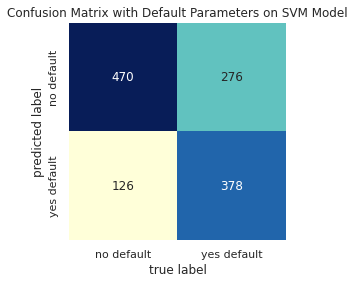

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = gen_svm_model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap (cm.T, square=True, annot=True, fmt='d', cbar=False, cmap="YlGnBu", xticklabels =['no default', 'yes default'], yticklabels=['no default', 'yes default'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix with Default Parameters on SVM Model')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print('The accuracy score for the first SVC model is: {:.3f}'.format(accuracy))

The accuracy score for the first SVC model is: 0.678


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [{'C':[1,10,100], 'kernel':['linear']}, {'C':[1,10,100], 'kernel':['rbf'], 'gamma':[0.01, 0.1, 1]}]

In [ ]:
gridsearch = GridSearchCV(estimator = gen_svm_model, param_grid = parameters)

In [ ]:
gridsearch = gridsearch.fit(X_train, y_train)

In [ ]:
accuracygs = gridsearch.best_score_
print('The GridSearchCV accuracy is: {:.2f}'.format(accuracy))
print('\n')
print('GridSearchCV identified the following as the best parameters for the SVM model')
gridsearch.best_params_

The GridSearchCV accuracy is: 0.68


GridSearchCV identified the following as the best parameters for the SVM model


{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
gs_svm_model = SVC(C=1, kernel='rbf', gamma=0.1, random_state=0)
gs_svm_model.fit(X_train, y_train)

SVC(C=1, gamma=0.1, random_state=0)

In [ ]:
y_pred = gs_svm_model.predict(X_test)
accuracybest = accuracy_score(y_test, y_pred)

print('The accuracy score for the SVC moel with the best parameters through GridSearchCV is: {:.3f}'.format(accuracybest))

The accuracy score for the SVC moel with the best parameters through GridSearchCV is: 0.702
